## Lineare Regression

In [1]:
import geopandas as gpd
import pandas as pd

# Pfad zur GeoJSON-Datei angeben
file_path = "../../data/processed_data/simra_osm_no_service_all.geojson"

# GeoJSON-Datei einlesen
gdf = gpd.read_file(file_path)

gdf.head(2)

,id,type,score,incidents,rides,index_right,maxspeed,asphalt,concrete,paving_stone,...,footway,highway_rare,living_street,path,primary,residential,secondary,tertiary,track,geometry
0,[100049].0,Street,0.0,0,138,35281.0,50,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,"POLYGON ((13.45412 52.54035, 13.45320 52.53977..."
1,[100069498].0,Junction,0.0,0,200,44754.0,30,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,"POLYGON ((13.52273 52.50704, 13.52248 52.50690..."


In [3]:
df = gdf.drop(columns=['id', 'index_right', 'geometry', 'markers', 'highway','type', 'incidents', 'rides'])

df.head(2)

,score,maxspeed,asphalt,concrete,paving_stone,sett,unpaved,cycleway,footway,highway_rare,living_street,path,primary,residential,secondary,tertiary,track
0,0.0,50,0.0,1.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0
1,0.0,30,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0


#### Zielvariable (Score) festlegen

In [4]:
# Zielvariable 
y = df['score']

# Alle anderen Spalten als Features verwenden 
X = df.drop(columns=['score'])

In [5]:
from sklearn.model_selection import train_test_split

#### Aufteilen der Daten in Trainings- und Testsets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Anzahl der Trainingsdaten: {X_train.shape[0]}")
print(f"Anzahl der Testdaten: {X_test.shape[0]}")

Anzahl der Trainingsdaten: 12434
Anzahl der Testdaten: 3109


!! Datensatz verkleinert sich, da 'Service' rausfällt

#### Modell trainieren

In [7]:
from sklearn.linear_model import LinearRegression

# Erstelle das lineare Regressionsmodell
lr = LinearRegression()

# Trainiere das Modell mit den Trainingsdaten
lr.fit(X_train, y_train)

LinearRegression()

#### Modell validierung

In [8]:
# Vorhersagen auf den Testdaten machen
y_pred = lr.predict(X_test)

#### Modell bewerten

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error (MSE) berechnen
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE) berechnen
rmse = mse ** 0.5

# R²-Wert berechnen
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²-Wert: {r2}')

MSE: 0.0016206277990301692
RMSE: 0.04025702173571921
R²-Wert: 0.0016461966673450013


#### Beurteilung der Werte

**R²-Wert: 0.0016461966673450013**

Der R²-Wert (Bestimmtheitsmaß) von 0,0016 zeigt an, dass das Modell **nur etwa 0,16 %** der Varianz der abhängigen Variable durch die unabhängige Variable(n) erklären kann. Dies ist ein sehr niedriger Wert und deutet darauf hin, dass das Modell kaum erklärende Kraft hat.


### Scatterplots zwischen Features und Zielvariable

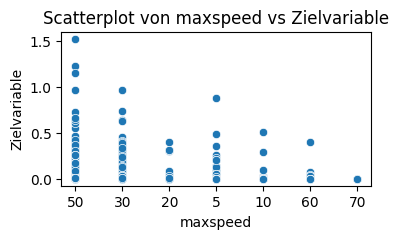

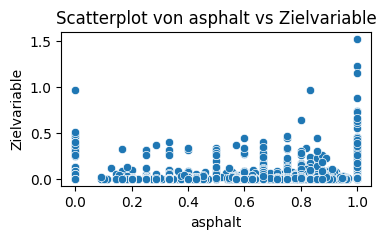

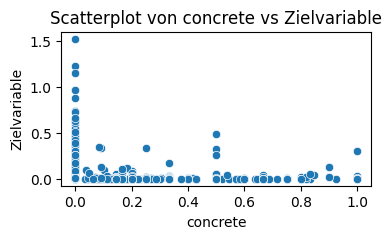

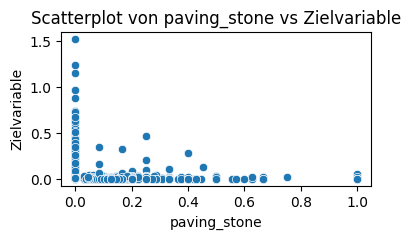

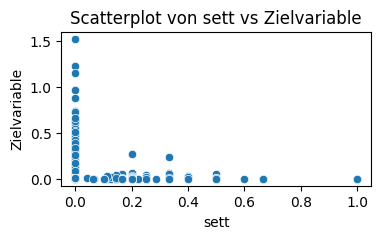

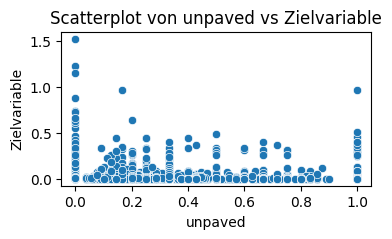

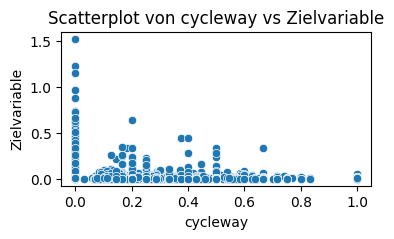

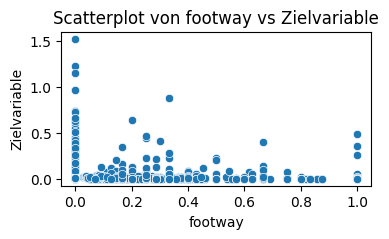

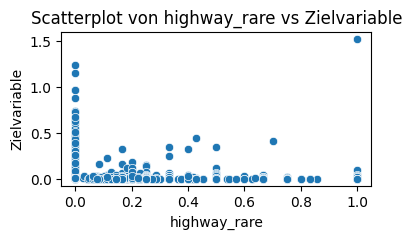

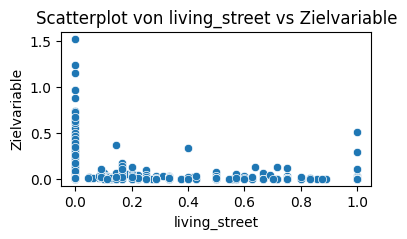

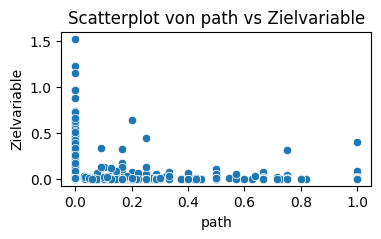

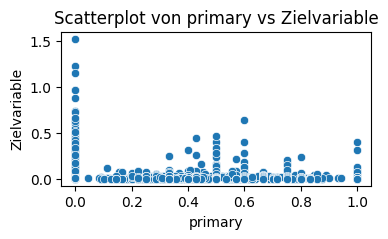

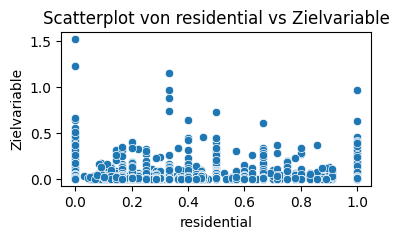

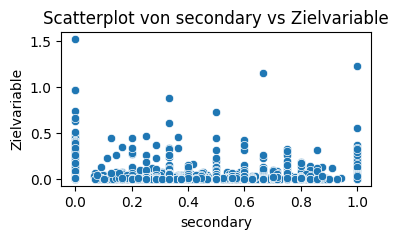

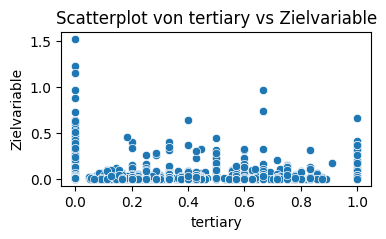

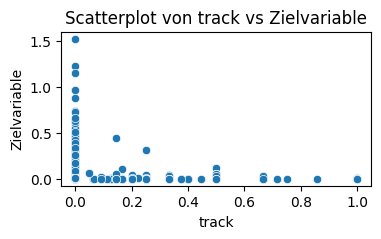

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in X.columns:
    plt.figure(figsize=(4,2))
    sns.scatterplot(x=X[column], y=y)
    plt.title(f'Scatterplot von {column} vs Zielvariable')
    plt.xlabel(column)
    plt.ylabel('Zielvariable')
    plt.show()

### Korrelationen zwischen Features und Zielvariable

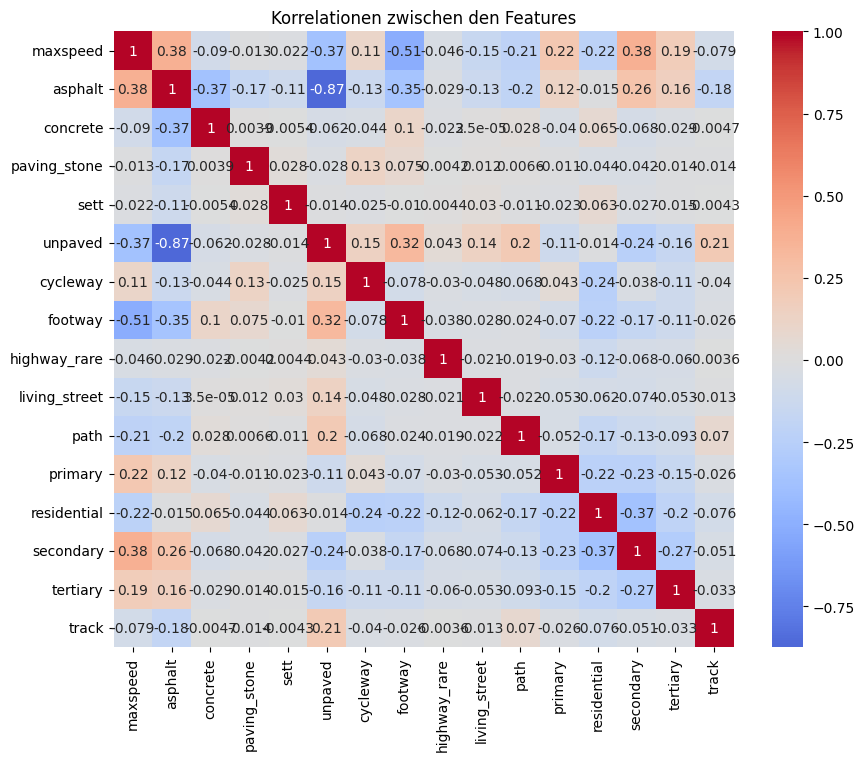

In [12]:
# Korrelationen berechnen
correlations = X.corr()

# Heatmap anzeigen
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", center=0)
plt.title('Korrelationen zwischen den Features')
plt.show()

**Was zu beachten ist:**
**Starke Korrelationen (nahe -1 oder 1)** zwischen Features und der Zielvariablen deuten auf eine **starke lineare Beziehung** hin.
**Schwache Korrelationen (nahe 0)** oder nicht-lineare Muster im Scatterplot deuten darauf hin, dass die **lineare Regression möglicherweise nicht optimal** ist.

### Kreuzvalidierung (CrossValidation)

### k-Fold

Anstatt nur einmal die Daten in Trainings- und Testdaten aufzuteilen, kannst man mit K-Fold-Cross-Validation die Stabilität des Modells über verschiedene Datensplits hinweg überprüfen.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

In [14]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

cv_scores_mse = cross_val_score(lr, X, y, cv=5, scoring=mse_scorer)

# Ergebnisse ausgeben (negative Werte, da MSE kleiner besser ist)
print(f"Cross-Validated MSE Scores: {cv_scores_mse}")
print(f"Durchschnittlicher MSE: {abs(cv_scores_mse.mean())}")

Cross-Validated MSE Scores: [-0.00262793 -0.00086967 -0.00077448 -0.00380201 -0.00127443]
Durchschnittlicher MSE: 0.0018697029092431192


#### Durchschnittlicher MSE 

In [15]:
# Durchschnittlicher MSE
print(f'Durchschnittlicher MSE über 5 Folds: {abs(cv_scores_mse.mean())}')

Durchschnittlicher MSE über 5 Folds: 0.0018697029092431192


**Beurteilung:**
Ein kleinerer MSE ist besser, und in diesem Fall ist der durchschnittliche MSE relativ klein, was auf eine insgesamt geringe Vorhersageabweichung hindeutet. Allerdings hängt die Beurteilung der Größe des MSE von der Skala deiner Zielvariable ab.

Es gibt eine gewisse Schwankung zwischen den Folds, was darauf hindeutet, dass das Modell je nach Datenaufteilung unterschiedliche Vorhersagegüten hat. Diese Variabilität kann bedeuten, dass das Modell empfindlich auf bestimmte Teilmengen der Daten reagiert, möglicherweise aufgrund von Ausreißern oder nicht erkannten Mustern in den Daten.

 #### R²-Wert

In [16]:
cv_scores_r2 = cross_val_score(lr, X, y, cv=5, scoring='r2')

# Ergebnisse ausgeben
print(f"Cross-Validated R² Scores: {cv_scores_r2}")
print(f"Durchschnittlicher R²-Wert: {cv_scores_r2.mean()}")

Cross-Validated R² Scores: [ 0.0029939  -0.0086054  -0.04728677 -0.00600402 -0.0023407 ]
Durchschnittlicher R²-Wert: -0.012248598341345906


**Beurteilung:**
Dieser negative Durchschnittswert des R² bedeutet, dass dein Modell insgesamt nicht gut darin ist, die Varianz in der Zielvariablen zu erklären. In manchen Folds (z.B. Fold 3 mit -0.0511) schneidet das Modell schlechter ab als eine Vorhersage, die einfach den Mittelwert der Zielvariablen für alle Datenpunkte verwendet hätte. Es gibt aber auch Folds, in denen der R²-Wert leicht positiv ist, was zeigt, dass das Modell zumindest in einigen Fällen ein bisschen besser ist als eine einfache Mittelwertvorhersage.

### Ridge Regression: Regularisierte lineare Regression

Die Ridge Regression fügt eine Regularisierungsstrafe hinzu, um Overfitting zu verhindern und das Modell stabiler zu machen. Der Parameter alpha steuert die Stärke der Regularisierung.

In [17]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
cv_scores_ridge = cross_val_score(ridge_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validated R² Scores (Ridge): {cv_scores_ridge}")
print(f"Durchschnittlicher R²-Wert (Ridge): {cv_scores_ridge.mean()}")

Cross-Validated R² Scores (Ridge): [ 0.00298858 -0.00854535 -0.04700578 -0.00600709 -0.00225473]
Durchschnittlicher R²-Wert (Ridge): -0.012164872495946466


**Parameter:
alpha=1.0:** Dieser Wert bestimmt die Regularisierungsstärke. Experimentiere, indem du verschiedene alpha-Werte ausprobierst, z.B. 0.1, 0.5, 10, um herauszufinden, welcher Wert am besten funktioniert.

In [18]:
ridge_model = Ridge(alpha=0.1)
cv_scores_ridge = cross_val_score(ridge_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validated R² Scores (Ridge): {cv_scores_ridge}")
print(f"Durchschnittlicher R²-Wert (Ridge): {cv_scores_ridge.mean()}")

Cross-Validated R² Scores (Ridge): [ 0.00299336 -0.00859927 -0.04725745 -0.00600433 -0.00233201]
Durchschnittlicher R²-Wert (Ridge): -0.012239941842063517


In [19]:
ridge_model = Ridge(alpha=0.5)
cv_scores_ridge = cross_val_score(ridge_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validated R² Scores (Ridge): {cv_scores_ridge}")
print(f"Durchschnittlicher R²-Wert (Ridge): {cv_scores_ridge.mean()}")

Cross-Validated R² Scores (Ridge): [ 0.00299123 -0.00857504 -0.04714297 -0.00600557 -0.00229748]
Durchschnittlicher R²-Wert (Ridge): -0.01220596407689425


In [20]:
ridge_model = Ridge(alpha=10)
cv_scores_ridge = cross_val_score(ridge_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validated R² Scores (Ridge): {cv_scores_ridge}")
print(f"Durchschnittlicher R²-Wert (Ridge): {cv_scores_ridge.mean()}")

Cross-Validated R² Scores (Ridge): [ 0.00294241 -0.00809561 -0.04524185 -0.00603105 -0.00156043]
Durchschnittlicher R²-Wert (Ridge): -0.011597305495166532


#### Erwartetes Ergebnis:
Wenn Ridge Regression hilfreich ist, sollten die R²-Werte stabiler und im Durchschnitt besser sein als bei der Standard-Linearen Regression. Der MSE sollte ebenfalls kleiner werden, insbesondere bei Folds, die bisher schlecht abgeschnitten haben.

!! Es ist leider kaum Besserung festzustellen.

### Ausreißer und Skalierung prüfen
Der StandardScaler wird verwendet, um die Features deiner Daten zu standardisieren, d.h. die Features auf eine Standardnormalverteilung (Mittelwert = 0, Standardabweichung = 1) zu skalieren. Dies kann hilfreich sein, wenn die Features unterschiedliche Größenordnungen haben und dadurch die Leistung von Modellen beeinflusst wird.

In [21]:
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score

# Daten in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler initialisieren
scaler = StandardScaler()

# Fit auf die Trainingsdaten und Transformation
X_train_scaled = scaler.fit_transform(X_train)

# Transformation der Testdaten
X_test_scaled = scaler.transform(X_test)

# Ridge Regression auf die skalierten Daten anwenden
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Vorhersagen machen
y_pred = ridge_model.predict(X_test_scaled)

# Metriken berechnen
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Durchschnittlicher MSE auf den Testdaten: {mse}")
print(f"Durchschnittlicher R²-Wert auf den Testdaten: {r2}")

Durchschnittlicher MSE auf den Testdaten: 0.001620627519754169
Durchschnittlicher R²-Wert auf den Testdaten: 0.0016463687094739887


#### Anwendung der Standardisierung auf das gesamte Dataset

In [22]:
from sklearn.model_selection import cross_val_score

# Daten skalieren
X_scaled = scaler.fit_transform(X)

# Ridge Regression auf die skalierten Daten anwenden
ridge_model = Ridge(alpha=1.0)

# Kreuzvalidierung auf den skalierten Daten
cv_scores = cross_val_score(ridge_model, X_scaled, y, cv=5, scoring='r2')

print(f"Cross-Validated R² Scores (Ridge mit Standardisierung): {cv_scores}")
print(f"Durchschnittlicher R²-Wert (Ridge mit Standardisierung): {cv_scores.mean()}")


Cross-Validated R² Scores (Ridge mit Standardisierung): [ 0.0029937  -0.00860328 -0.04728353 -0.00600422 -0.00233964]
Durchschnittlicher R²-Wert (Ridge mit Standardisierung): -0.012247392833636938


!! Es ist leider kaum Besserung festzustellen.

### Hyperparameter-Tuning

Es kann hilfreich sein, die Hyperparameter des Modells systematisch zu optimieren. Mit GridSearchCV kann man verschiedene Parameterwerte ausprobieren und den besten Satz von Hyperparametern finden.

In [23]:
from sklearn.model_selection import GridSearchCV

# Parametergrid für Ridge Regression definieren
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# GridSearchCV initialisieren
grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=5, scoring='r2')

# Grid Search auf die skalierten Daten anwenden
grid_search.fit(X_scaled, y)

# Beste Parameter und Score ausgeben
print(f"Beste Parameter: {grid_search.best_params_}")
print(f"Beste Kreuzvalidierungs-R²: {grid_search.best_score_}")

Beste Parameter: {'alpha': 100.0}
Beste Kreuzvalidierungs-R²: -0.012131155776031077


#### **Beruteilung:**

**Beste Parameter: {'alpha': 100.0}**
alpha: Dieser Wert von 100.0 ist der Regularisierungsparameter, der die Stärke der Regularisierung in der Ridge Regression bestimmt. Ein hoher Wert für alpha führt zu einer stärkeren Regularisierung, was die Größe der Koeffizienten der Features reduziert und das Modell simpler macht. In diesem Fall hat sich gezeigt, dass eine starke Regularisierung die beste Leistung auf den Validierungsdaten erzielt hat.

**Beste Kreuzvalidierungs-R²: -0.01213**
R²-Wert: Der R²-Wert gibt an, wie gut das Modell die Varianz in der Zielvariablen erklärt. Ein Wert von -0.01213 ist sehr niedrig und negativ, was bedeutet, dass das Modell schlechter abschneidet als eine naive Mittelwertvorhersage. Ein negativer R²-Wert zeigt, dass das Modell sehr *wahrscheinlich keine brauchbaren Muster in den Daten erfasst* und die Vorhersagen weit von den tatsächlichen Werten entfernt sind.

#### **Interpretation der Ergebnisse**

**Regulierung mit hohem Alpha-Wert**
Ein hoher Wert für alpha, wie 100.0, bedeutet, dass das Modell stark regularisiert ist. Dies hat den Effekt, dass die Koeffizienten der Features stark bestraft werden, was dazu führen kann, dass das Modell zu einfach wird und nicht genügend Flexibilität hat, um die Daten gut zu modellieren.

**Schlechter R²-Wert**
Der negative R²-Wert weist darauf hin, dass die Ridge Regression in diesem Fall nicht in der Lage ist, nützliche Beziehungen zwischen den Features und der Zielvariable zu erkennen. Es deutet darauf hin, dass das Modell die Zielvariable nicht gut vorhersagt und dass die Vorhersagen näher am Mittelwert der Zielvariablen liegen als an den tatsächlichen Werten.


### Visu

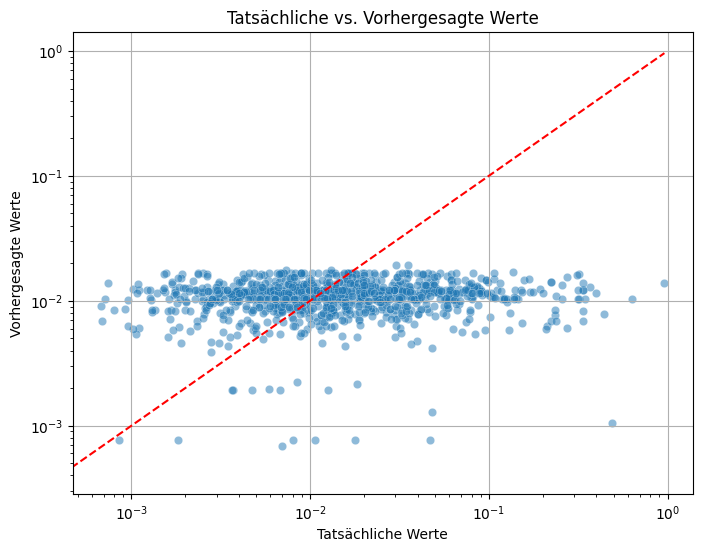

In [24]:
# Scatterplot der tatsächlichen vs. vorhergesagten Werte erstellen
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='w', linewidth=0.3)
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.title('Tatsächliche vs. Vorhergesagte Werte')

# Logarithmische Skalierung der Achsen
plt.xscale('log')
plt.yscale('log')


plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonale Linie
plt.grid(True)
plt.show()